Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

Data Collection and Analysis

PIMA Diabetes Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [ ]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
# number of missing values in each column
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[-1.13796489 -0.07971099 -3.5556072  ...  0.02825037 -0.98159708
  -0.7885233 ]
 [ 0.64067858 -0.52091877  0.02549599 ... -0.17184452 -1.03823795
   0.31879426]
 [-0.84152431  2.12632792 -0.48609018 ... -0.25938604 -0.21545477
   2.19271628]
 ...
 [ 2.12288146 -1.15121561  0.23013046 ... -0.25938604 -0.50760242
   0.14843771]
 [ 0.04779742 -0.30031488  0.43476492 ...  0.90366551 -0.69839272
   0.40397253]
 [-1.13796489 -1.11970076 -0.07682125 ...  0.45345201 -0.69243053
  -0.70334503]]


In [ ]:
print(X_test)

[[-0.24864315 -0.48940393  0.12781322 ... -0.79714106 -0.78484458
  -0.53298848]
 [-0.24864315 -0.26880004 -1.30462805 ... -1.2223427  -0.98457818
  -0.95887985]
 [ 0.344238    0.80270457  0.43476492 ...  0.19082747 -0.7520525
   2.70378593]
 ...
 [-0.54508373 -0.36334457  0.23013046 ...  0.02825037  0.67887478
  -0.53298848]
 [-0.54508373 -1.27727497  0.12781322 ... -0.25938604  0.22872891
  -0.70334503]
 [ 2.71576261 -0.48940393  0.12781322 ...  0.55349946 -0.87129644
   1.00022045]]


<Axes: xlabel='Outcome'>

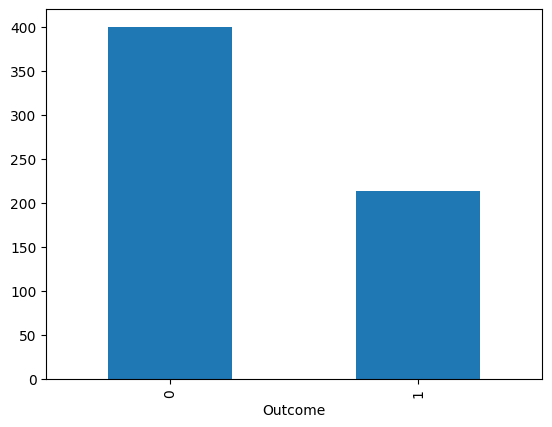

In [ ]:
Y_train.value_counts().plot(kind='bar')

In [ ]:
# smote=SMOTE()
# X_train,Y_train=smote.fit_resample(X_train,Y_train)

In [ ]:
# Y_train.value_counts().plot(kind='bar')

Training the Model

In [ ]:
# Define the SVC model
svc = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Print the best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_}')

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(Y_test, y_pred)}')
print('Classification Report:')
print(classification_report(Y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(Y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best Cross-Validation Score: 0.7817006530721045
Accuracy: 0.7727272727272727
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       100
           1       0.76      0.52      0.62        54

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154

Confusion Matrix:
[[91  9]
 [26 28]]


Model Training Evaluation

In [ ]:
# Make predictions on the training data
X_train_prediction = best_model.predict(X_train)

# Calculate training accuracy
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


Making a Predictive System

In [ ]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Changing the input_data to a DataFrame with feature names
input_data_as_dataframe = pd.DataFrame([input_data], columns=feature_names)

# Standardize the input data
std_data = scaler.transform(input_data_as_dataframe)
print(std_data)

# Make prediction
prediction = best_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[[ 0.344238    1.40148656  0.12781322 -0.10834817  0.77530224 -0.79714106
   0.34797285  1.51129009]]
[1]
The person is diabetic
